6CCM359A Numerical Methods <br>
<b>Practical 2</b> <br>
Aneta Swianiewicz 

In [1]:
import matplotlib.pyplot as plt
import mpmath as mp
import numpy as np

####  Write a function which computes Fibbonacci number $F_n$. Where $F_n$ is defined by
$$
F_n=F_{n-1}+F_{n-2}\;\;,\;\;F_0=0\;\;,\;\;F_1=1
$$

In [61]:
def fibonacci(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    return fibonacci(n-1) + fibonacci(n-2)
        

In [83]:
fibonacci(24)

46368

#### Using multiple precision library (mpmath) check that the Newton method converges to $x^*=0$ linearly for $f(x)=\sin^2(x)$. Plot the ``number of exact digits" as a function of iterations

In [104]:
np.sin(1.2)

0.9320390859672263

In [128]:
mp.mp.dps = 50
mp.sin(1.2)

mpf('0.93203908596722633357821754863592919591810907431834684')

In [144]:
def f(x):
    return mp.sin(x)**2

In [145]:
def df(x):
    return 2*mp.sin(x)*mp.cos(x)

In [171]:
def newton(x0, f, df, n):
    xs = [x0]
    ys = [f(x0)]
    for i in range(n):
        xs.append(xs[-1]-f(xs[-1])/df(xs[-1]))
        ys.append(f(xs[-1]))
    return (xs, ys)

In [172]:
newton, exact_digits = newton(4.5, f, df, 50)

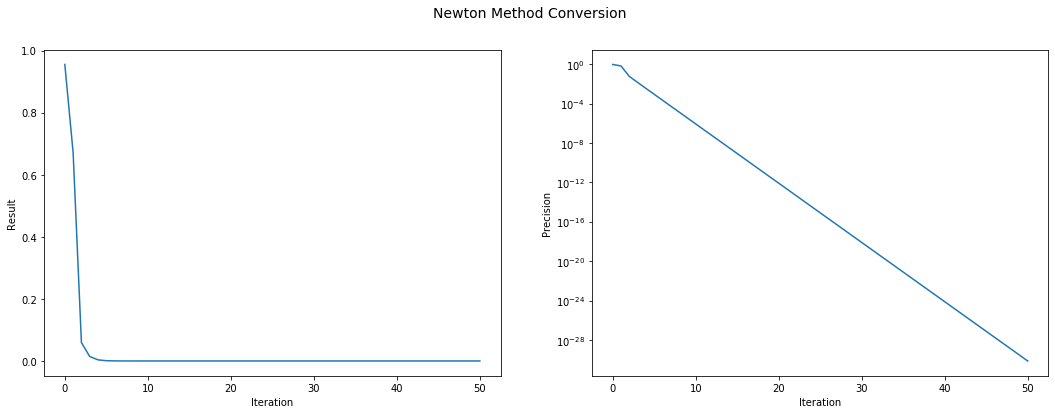

In [187]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
ax1.plot(range(51), exact_digits)
ax2.semilogy(range(51), exact_digits)
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Result")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Precision")
fig.suptitle("Newton Method Conversion", fontsize=14)
plt.show()

#### Make a 3D plot of the function $sin(x+y^2)$ for $y\in[-2,2]$ and $x\in [-3,3]$

In [22]:
from mpl_toolkits.mplot3d import Axes3D

In [118]:
y = np.linspace(-2,2,100)
x = np.linspace(-3,3,100)
X, Y = np.meshgrid(x,y)
z = np.sin(X+Y**2)

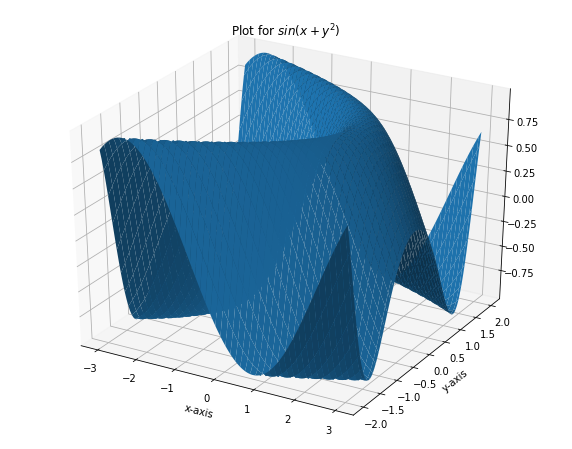

In [122]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, z)
ax.set_title("Plot for $sin(x+y^2)$")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
plt.show()

#### Write a function $f(n)$ which returns $n^2$ for even $n$ and $n^3$ otherwise

In [34]:
def function(n):
    if n % 2 == 0:
        return n**2
    return n**3

In [35]:
function(4)

16

In [36]:
function(3)

27

#### Write a function that reverses a list.

In [23]:
def reverse_list(x):
    return x[::-1]

In [24]:
sample_list = [1,2,3,4,5,6]

In [25]:
reverse_list(sample_list)

[6, 5, 4, 3, 2, 1]

#### Write a function which computes the average of all elements of a list.

In [32]:
def compute_avg(x):
    return sum(x)/len(x)

In [33]:
compute_avg([1,2,3])

2.0

#### Write a function that checks whether an element occurs in a list (and returns True of False).

In [37]:
def check_list(lst, x):
    for i in lst:
        if i == x:
            return True
    return False

In [38]:
check_list([2,3,4],8)

False

In [39]:
check_list([2,3,4,8],8)

True

#### Write a program that prints a multiplication table.

In [55]:
def print_multiplication(n):
    table = []
    for i in range(1,n+1):
        table.append([j*i for j in range(1,n+1)])
    print(np.array(table))

In [58]:
print_multiplication(13)

[[  1   2   3   4   5   6   7   8   9  10  11  12  13]
 [  2   4   6   8  10  12  14  16  18  20  22  24  26]
 [  3   6   9  12  15  18  21  24  27  30  33  36  39]
 [  4   8  12  16  20  24  28  32  36  40  44  48  52]
 [  5  10  15  20  25  30  35  40  45  50  55  60  65]
 [  6  12  18  24  30  36  42  48  54  60  66  72  78]
 [  7  14  21  28  35  42  49  56  63  70  77  84  91]
 [  8  16  24  32  40  48  56  64  72  80  88  96 104]
 [  9  18  27  36  45  54  63  72  81  90  99 108 117]
 [ 10  20  30  40  50  60  70  80  90 100 110 120 130]
 [ 11  22  33  44  55  66  77  88  99 110 121 132 143]
 [ 12  24  36  48  60  72  84  96 108 120 132 144 156]
 [ 13  26  39  52  65  78  91 104 117 130 143 156 169]]


#### Write a program that computes
$$
	4\sum_{k=1}^{10^5} \frac{(-1)^{k+1}}{2k-1} = 4\,\Big(1-\frac13 + \frac15 - \frac17 +-\ldots\Big)
$$

In [59]:
def sum_func():
    return 4*sum([(-1)**(k+1)/(2*k-1) for k in range(1,10**5+1)])

In [60]:
sum_func()

3.1415826535897198

#### Interpolate the following data with a Lagrange polynomial
$$
	x_i = 1,2,3,4,5\\
	y_i = 10,98,426,1252,2930
$$

In [6]:
x = [i for i in range(1,6)]
y = [10,98,426,1252,2930]

$$
p_i(x) = \prod_{j=0, j \neq i}^{n}\frac{x − x_j}{x_i − x_j}
$$

In [7]:
# little p function
def pip(x,i,xs):
    xi = xs[i]
    res = 1
    for xj in xs:
        if xj != xi:
            res *= (x-xj)/(xi-xj)
    return res

$$
P_n(x) = \sum_{l=0}^{n}y_ip_i(x)
$$

In [8]:
# Lagrange function
def lagrange(x,ys,xs):
    res = 0
    for i in range(len(xs)):
        res += ys[i]*pip(x,i,xs)
    return res


In [10]:
lagrange(5, y, x)

2930.0

In [12]:
xdense = np.linspace(0,5,500)

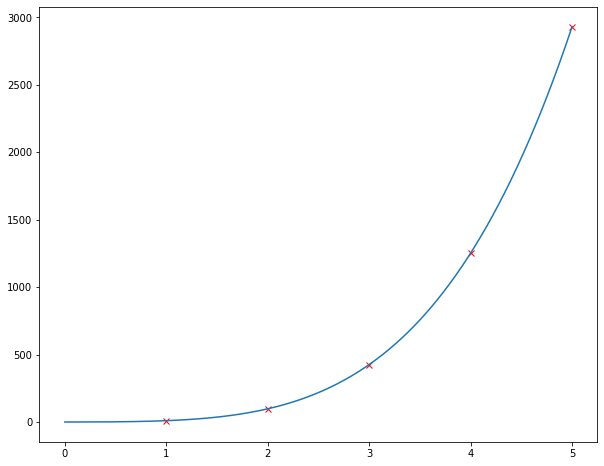

In [13]:
# plot
fig, ax = plt.subplots( figsize = (10,8))
ax.plot(x, y, "rx")
ax.plot(xdense, lagrange(xdense, y, x))
plt.show()

#### Fit the data
$$
	x_i = 1,2,3,4,5\\
	y_i = 10,98,426,1252,2930
$$
with the functions $\sin(x),\,\cos(x),\,\sin(2x),\,\cos(2x)$.

In [2]:
from scipy.linalg import solve

In [43]:
x = np.array([i for i in range(1,6)])
y = np.array([0,3,-2,-5,3])

In [44]:
function_list = [lambda x: np.sin(x), lambda x: np.cos(x), lambda x: np.sin(2*x), lambda x: np.cos(2*x)]

In [45]:
### get matrix
def find_as(xs, ys, function_list):
    m = len(function_list)
    A = np.zeros((m, m))
    b = np.zeros(m)
    for i in range(m):
        for j in range(m):
            A[i][j] = sum([function_list[i](x)*function_list[j](x) for x in xs])
    for i in range(m):
        b[i] = np.dot([function_list[i](x) for x in xs], ys)
    coeffs = solve(A,b)
    def fit(x):
        return sum([coeffs[i]*function_list[i](x) for i in range(m)])
    return fit

In [46]:
ft = find_as(x, y, function_list)
xdense = np.arange (0 ,7 ,0.1)
fitlist = list(map(lambda x: ft(x), xdense ))

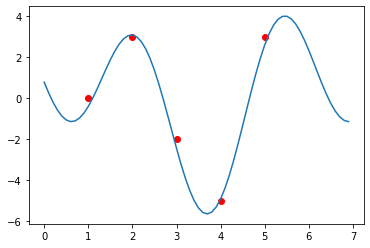

In [47]:
# plot
plt.plot(x , y , 'ro')
plt.plot(xdense, fitlist)
plt.show ()

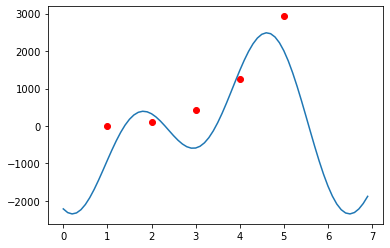

In [48]:
y = np.array([10,98,426,1252,2930])

ft = find_as(x, y, function_list)
xdense = np.arange (0 ,7 ,0.1)
fitlist = list(map(lambda x: ft(x), xdense ))
# plot
plt.plot(x , y , 'ro')
plt.plot(xdense, fitlist)
plt.show ()


#### For the function $f(x) = e^{x}+2x$, and at the values $x=0,1,2$, plot the number of correct digits, under machine precision $10^{-16}$, for the following approximation of the derivative:
$$
f'(x)\approx\frac{f(x-2h)-f(x+2h)+8f(x+h)-8 f(x-h)}{12h}.
$$
Plot this as a function of $-\log_{10} h$ (the power of $10^{-1}$ at which $h$ is set). By analysing your plot, confirm that this
approximation is correct up to $O(h^4)$.

In [66]:
x = np.array([0,1,2])

In [92]:
def f(x):
    return mp.exp(float(x)) + 2*x
def df(x):
    return mp.exp(float(x)) + 2

In [93]:
mp.mp.dps = 40

In [118]:
### derivative approximation function
def digits(f, df, x, h):
    difference = ((f(x-2*h) - f(x+2*h) + 8*f(x+h) - 8*f(x-h))/(12*h)) - df(x)
    return float(-mp.log(abs(difference))/mp.log(10))

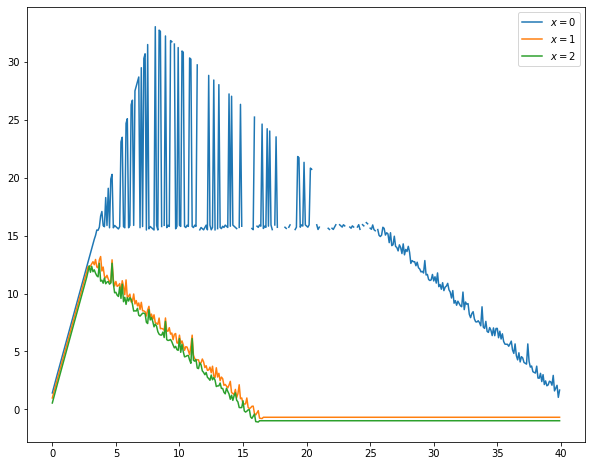

In [123]:
### plot
xdense = np.arange(0,40,0.1)
plt.figure(figsize=(10,8))
plt.plot(xdense,[digits(f, df, 0, 10**(-x)) for x in xdense], label="$x = 0$")
plt.plot(xdense,[digits(f, df, 1, 10**(-x)) for x in xdense], label="$x = 1$")
plt.plot(xdense,[digits(f, df, 2, 10**(-x)) for x in xdense], label="$x = 2$")
plt.legend()
plt.show()